<a href="https://colab.research.google.com/github/owachob/DataVisFinalProject/blob/main/01-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Well Log Analysis: SPWLA 2020 Petrophysical Data-Driven Analytics Contest

In 2020, [SWPLA](https://www.spwla.org/) (Society of Petrophysicists and Well Log Analysts) organized a contest to test the ability of machine-learning algorithms to analyze well-log information.

![](https://frontier-cf252.com/wp-content/uploads/oandg-large.jpg)

https://frontier-cf252.com/industries/well-logging/

## Background information

https://github.com/pddasig/Machine-Learning-Competition-2020

Well logs are interpreted/processed to estimate the in-situ petrophysical and geomechanical properties, which is essential for subsurface characterization. Various types of logs exist, and each provides distinct information about subsurface properties. Certain well logs, such as gamma ray (GR), resistivity, density, and neutron logs, are considered as “easy-to-acquire” conventional well logs that are run in most of the wells. Other well logs, such as nuclear magnetic resonance, dielectric dispersion, elemental spectroscopy, and sometimes sonic logs, are only run in limited number of wells.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Sonic_log.png/444px-Sonic_log.png)

https://en.wikipedia.org/wiki/Sonic_logging


[Sonic travel-time logs](https://wiki.seg.org/wiki/Dictionary:Sonic_log) contain critical geomechanical information for subsurface characterization around the wellbore. Often, sonic logs are required to complete the well-seismic tie workflow or geomechanical properties prediction. When sonic logs are absent in a well or an interval, a common practice is synthesizing them based on neighboring wells with sonic logs. This procedure is known as *sonic log synthesis* or pseudo sonic log generation.

## Download data

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=d1c775cffe2caaaa814e5c32985f2163acd00cb7b75fc728df38f15e9f95ad97
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
import wget

#download data
url = 'https://github.com/pddasig/Machine-Learning-Competition-2020/raw/master/Data3_1_2020.zip'
wget.download(url)

'Data3_1_2020.zip'

In [3]:
import zipfile

# Extract training data
with zipfile.ZipFile('Data3_1_2020.zip', 'r') as zipf:
    zipf.extract('train.csv')

The data is in the form of a CSV (comma-separated values) file. Different rows correspond to different depth levels in the borehole, and columns correspond to different logs.

We will use [pandas](https://pandas.pydata.org/), a Python data analysis library, for managing data.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/512px-Pandas_logo.svg.png)

In [4]:
import pandas as pd

In [5]:
# load data from the CSV file into a dataframe

logs = pd.read_csv('train.csv')
logs.head()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
0,-999.0,-999.0,41.4699,-999.0,-999.0,-999.0,-999.0,128.0737,319.0654
1,-999.0,-999.0,42.5053,-999.0,-999.0,-999.0,-999.0,127.8347,318.7825
2,-999.0,-999.0,43.1548,-999.0,-999.0,-999.0,-999.0,127.2307,317.3323
3,-999.0,-999.0,43.2410,-999.0,-999.0,-999.0,-999.0,126.2917,313.6486
4,-999.0,-999.0,40.3218,-999.0,-999.0,-999.0,-999.0,125.3985,307.8903


In [6]:
# data information
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30143 entries, 0 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     30143 non-null  float64
 1   CNC     30143 non-null  float64
 2   GR      30143 non-null  float64
 3   HRD     30143 non-null  float64
 4   HRM     30143 non-null  float64
 5   PE      30143 non-null  float64
 6   ZDEN    30143 non-null  float64
 7   DTC     30143 non-null  float64
 8   DTS     30143 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [7]:
# data attributes
logs.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC,DTS
count,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000,30143.000000
mean,-8.394576,-23.692615,38.959845,3.977690,1.547299,-17.446739,-20.229982,-54.891703,-9.737567
std,129.970219,157.142679,108.504554,365.112753,456.908969,149.083136,148.809506,372.858812,440.314119
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,8.058350,0.122800,17.248750,0.717700,0.712050,0.053100,2.226700,66.304350,118.534350
50%,8.625000,0.193600,36.821800,1.623000,1.628100,4.941500,2.432200,78.355100,137.689300
75%,9.048850,0.337150,58.346150,3.158300,3.280600,7.856650,2.551350,107.022500,182.973150
max,21.064200,3490.158200,1470.253400,10000.000000,60467.761700,28.106400,3.259700,155.980300,487.438400


## Meaning of different columns

| Key | Description | Unit |
|-----|-------------|------|
| **CAL** | Caliper log | inch |
| **CNC** | Neutron log  | dec  |
| **GR**  | Gamma Ray log | API |
| **HRD** | Deep Resistivity log | Ohm per meter |
| **HRM** | Medium Resistivity log  | Ohm per meter |
| **PE**  | Photo-Electric Factor log | Barn |
| **ZDEN**| Density log | grams per cubic meter |
| **DTC** | Compressional Travel-time log | nanosecond per foot |
| **DTS** | Shear Travel-time log | nanosecond per foot |

Values set to -999 mark missing values.

The goal is to predict sonic logs (**DTC** and **DTS**) from the other logs.

Let us start by removing missing data.

In [8]:
import numpy as np

# replace -999 with NaN
logs.replace(-999, np.nan, inplace=True)
# drop rows with NaN
logs.dropna(inplace=True)

In [9]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CAL     20525 non-null  float64
 1   CNC     20525 non-null  float64
 2   GR      20525 non-null  float64
 3   HRD     20525 non-null  float64
 4   HRM     20525 non-null  float64
 5   PE      20525 non-null  float64
 6   ZDEN    20525 non-null  float64
 7   DTC     20525 non-null  float64
 8   DTS     20525 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


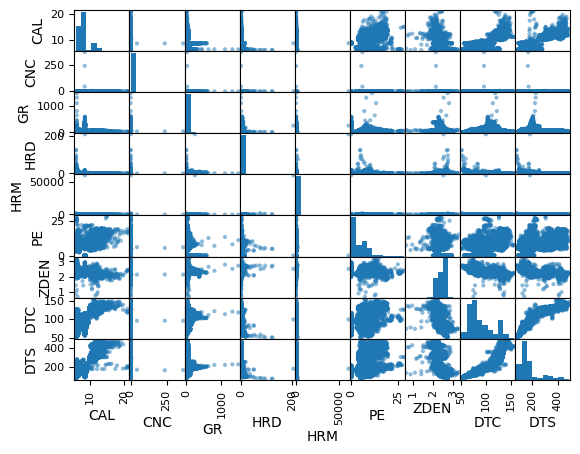

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# visualize cross-dependence of different data columns
scatter_matrix(logs)
plt.show()

## Attempt to predict sonic from density

We will start by selecting only two logs (**ZDEN** and **DTC**) and attempt to predict one from the other using a simple linear regression. The attempt may fail, but it will illustrate the general setup of the problem.

First, we will drop missing or anomalous values and examine the data distribution.

In [11]:
# select two logs
two = logs.loc[:, ('ZDEN', 'DTC')]
# data information
two.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20525 non-null  float64
 1   DTC     20525 non-null  float64
dtypes: float64(2)
memory usage: 481.1 KB


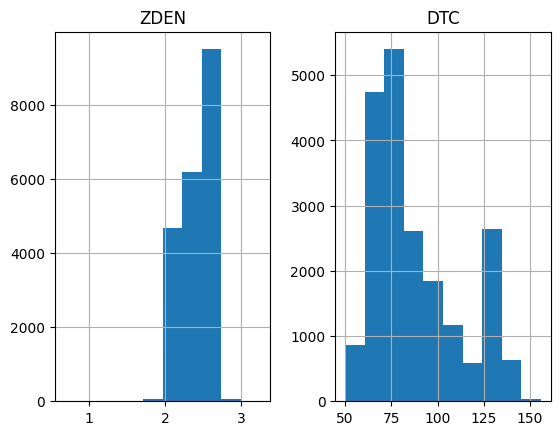

In [12]:
# display histogram
hist = two.hist()

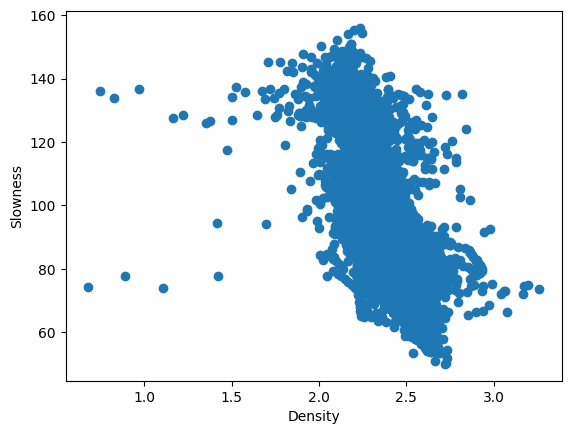

In [13]:
# display scatter plot

plt.scatter(two.ZDEN, two.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [14]:
# remove anomalous density values
two2 = two.loc[(two.ZDEN > 1.5) & (two.ZDEN < 3.1)]
two2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20508 entries, 573 to 30142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20508 non-null  float64
 1   DTC     20508 non-null  float64
dtypes: float64(2)
memory usage: 480.7 KB


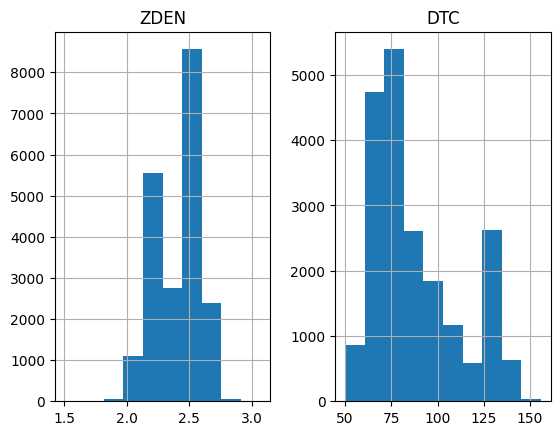

In [15]:
two2_hist = two2.hist()

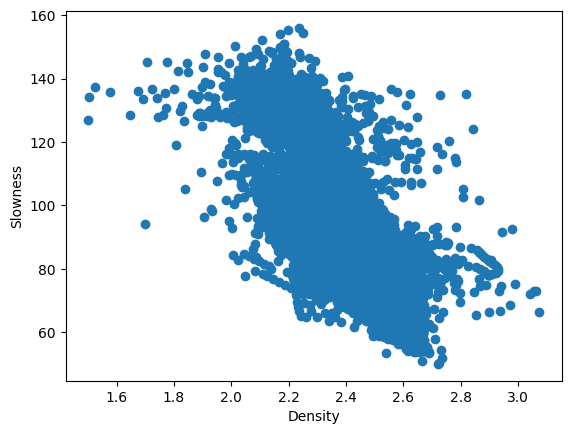

In [16]:
plt.scatter(two2.ZDEN, two2.DTC)
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

The dependence is complicated, but we can observe a general trend of slowness decreasing with density. Next, we will approximate this dependence with a straight line using *linear regression*, a classic statistical tool.

How do we know if our model works? We can divide the data into two parts: training and testing. We can then use the training part to fit the model and the testing part to validate the result. We will select 80% of the data for training and the remaining 20% for validation.

In [17]:
# divide into training and testing

# logical mask
select = np.random.rand(len(two2)) < 0.8
train = two2[select]
test = two2[~select]

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16400 entries, 573 to 30141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    16400 non-null  float64
 1   DTC     16400 non-null  float64
dtypes: float64(2)
memory usage: 384.4 KB


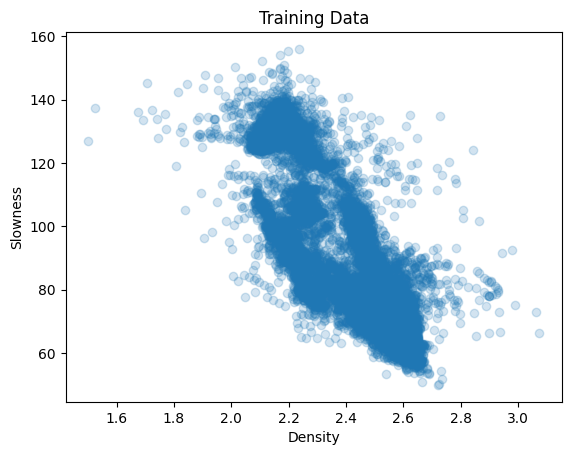

In [18]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.title('Training Data')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

## Linear regression

Among other models, linear regression is provided by [scikit-learn](https://scikit-learn.org/), a package for classic machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png)

In [19]:
# create model
from sklearn import linear_model

model = linear_model.LinearRegression()

# train model
model.fit(train[['ZDEN']], train['DTC'])

LinearRegression()

Our first model has only two parameters: the intercept $a$ and the slope $b$ in the equation
$$s(\rho)=a+b\,\rho\;.$$
Fitting the model means estimating these parameters from the data.

In [20]:
# regression coefficients
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

Intercept:  348.1119195355167
Coefficients:  [-107.70522044]


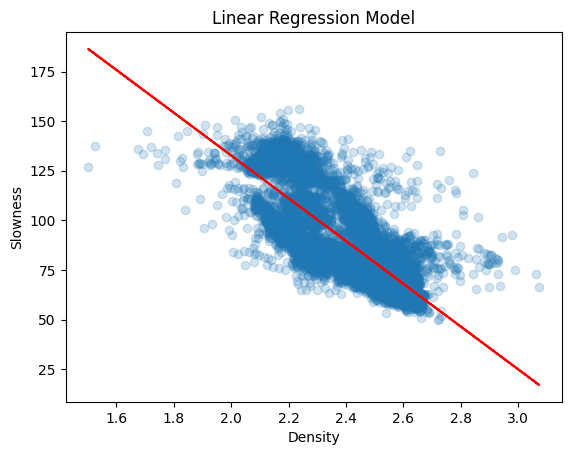

In [21]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
plt.plot(train.ZDEN, model.intercept_ +
        train.ZDEN * model.coef_[0], '-r')
plt.title('Linear Regression Model')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

Now, we can turn to the testing data and see how well our model predicts it.

There are different ways to measure the error. If $p_n$ are predicted values and $v_n$ are actual values, the classic linear regression uses the least-squares misfit

$\displaystyle \sum_{n=1}^{N} (p_n - v_n)^2\;.$

The root-mean-square error is defined as

$\displaystyle  \sqrt{\frac{1}{N} \sum_{n=1}^{N} (p_n - v_n)^2}\;.$

In [22]:
# evaluate prediction error
from sklearn.metrics import root_mean_squared_error

want = test['DTC']
get = model.predict(test[['ZDEN']])

print("RMS error: %.3f" % np.sqrt(np.mean((get - want)**2)))
print("RMS error: %.3f" % root_mean_squared_error(get, want))

RMS error: 13.973
RMS error: 13.973


In [23]:
root_mean_squared_error?

## How does it work?

The model parameters are estimated by minimizing the desired objective function. In the case of linear regression, the dependence on parameters is quadratic, and the minimum is found analytically. In the more general case, the minimization is achieved by some form of gradient descent.

In [24]:
def least_squares(a, b):
    d = train['ZDEN']
    s = train['DTC']
    return root_mean_squared_error(a+b*d, s)

a, b = np.meshgrid(
    np.linspace(start=-400, stop=1000, num=101),
    np.linspace(start=-400, stop=200,  num=101))
error = np.vectorize(least_squares)(a, b)

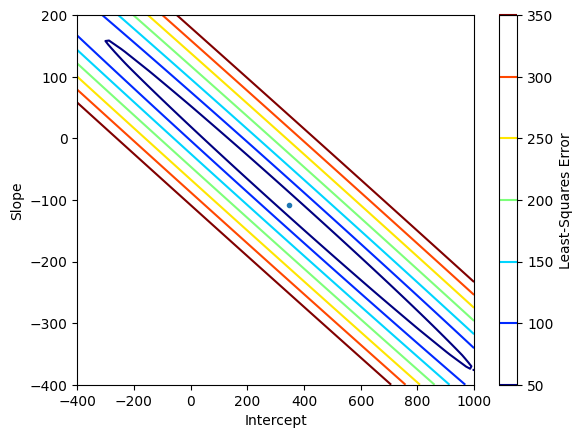

In [25]:
# plot surface
plt.contour(a, b, error, [50, 100, 150, 200, 250, 300, 350], cmap='jet')
plt.plot(model.intercept_, model.coef_[0], marker='.')
plt.xlabel('Intercept')
plt.ylabel('Slope')
plt.colorbar(label='Least-Squares Error')
plt.show()

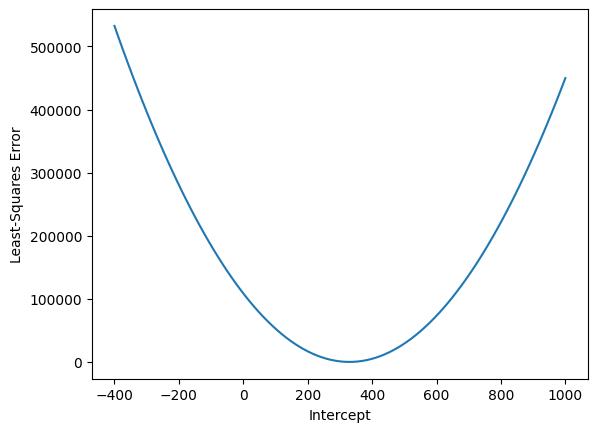

In [26]:
a = np.linspace(start=-400, stop=1000, num=101)
error = np.vectorize(least_squares)(a, -100)
plt.plot(a, error**2)
plt.xlabel('Intercept')
plt.ylabel('Least-Squares Error')
plt.show()

## How can we improve it?

One approach to complicate the dependence would be to extend the model, for example, from a line to a parabola.

In [27]:
# extend the model with density raised to degree 2
train = train.assign(ZDEN2=np.power(train.ZDEN, 2))
train.describe()

,ZDEN,DTC,ZDEN2
count,16400.000000,16400.000000,16400.000000
mean,2.412309,88.293697,5.850902
std,0.177965,23.532598,0.846461
min,1.501600,49.970500,2.254803
25%,2.236500,70.381600,5.001932
50%,2.467700,79.720650,6.089543
75%,2.564100,102.463875,6.574609
max,3.073500,155.980300,9.446402


In [28]:
# create model
model2 = linear_model.LinearRegression()

# train model
model2.fit(train[['ZDEN', 'ZDEN2']], train['DTC'])

LinearRegression()

In [29]:
# regression coefficients
print('Intercept: ', model2.intercept_)
print('Coefficients: ', model2.coef_)

Intercept:  607.6682197266495
Coefficients:  [-327.40792685   46.22097822]


The model changes from
$$s(\rho) = a + b\,\rho$$
to
$$s(\rho) = a + b_1\,\rho + b_2\,\rho^2$$

and involves three parameters ($a,b_1,b_2$) instead of two ($a,b$) as in the previous case.

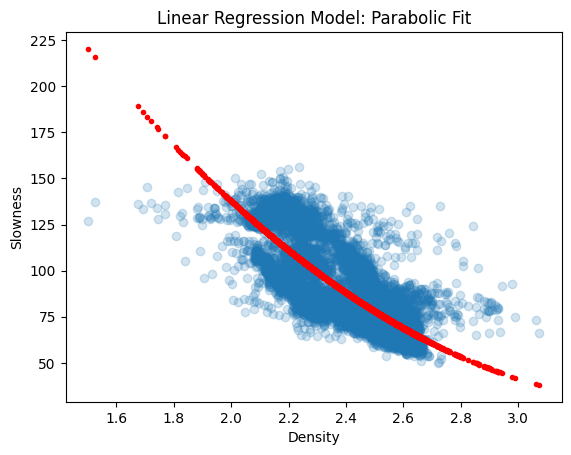

In [30]:
plt.scatter(train.ZDEN, train.DTC, alpha=0.2)
parabola = model2.intercept_ + \
      train.ZDEN  * model2.coef_[0] + \
      train.ZDEN2 * model2.coef_[1]
plt.plot(train.ZDEN, parabola, '.r')
plt.title('Linear Regression Model: Parabolic Fit')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

In [31]:
test = test.assign(ZDEN2=np.power(test.ZDEN, 2))

want = test['DTC']
get2 = model2.predict(test[['ZDEN', 'ZDEN2']])

print("RMS error: %.3f" % root_mean_squared_error(get2, want))

RMS error: 13.930


## Task 1

<div class="alert alert-block alert-info">
Can you improve the fit further by using a higher-degree polynomial?

$$s(\rho) = a_0 + b_1\,\rho + b_2\,\rho^2 + b_3\,\rho^3 + \cdots + b_N\,\rho^N$$

Choose $N \ge 3$ and add code to try it out.</div>

In [32]:
degree = 5

# Generate polynomial features, including renaming the original ZDEN column
train = train.rename(columns={'ZDEN': 'ZDEN1'})  # Rename 'ZDEN' to 'ZDEN1'
for i in range(2, degree + 1):
    train[f'ZDEN{i}'] = np.power(train['ZDEN1'], i) # Use 'ZDEN1' for calculations


# Create a linear regression model
model_poly = linear_model.LinearRegression()

# Define the feature columns for the polynomial model
feature_cols = [f'ZDEN{i}' for i in range(1, degree + 1)]

# Train the model
model_poly.fit(train[feature_cols], train['DTC'])

train.describe()

,ZDEN1,DTC,ZDEN2,ZDEN3,ZDEN4,ZDEN5
count,16400.000000,16400.000000,16400.000000,16400.000000,16400.000000,16400.000000
mean,2.412309,88.293697,5.850902,14.264716,34.949507,86.028079
std,0.177965,23.532598,0.846461,3.034213,9.713648,29.290134
min,1.501600,49.970500,2.254803,3.385812,5.084135,7.634336
25%,2.236500,70.381600,5.001932,11.186821,25.019326,55.955723
50%,2.467700,79.720650,6.089543,15.027166,37.082537,91.508578
75%,2.564100,102.463875,6.574609,16.857954,43.225481,110.834456
max,3.073500,155.980300,9.446402,29.033517,89.234515,274.262283


In [33]:
# Generate polynomial features for the test set
# Rename 'ZDEN' to 'ZDEN1' in the test set to match the training set
test = test.rename(columns={'ZDEN': 'ZDEN1'})

for i in range(2, degree + 1):
    test[f'ZDEN{i}'] = np.power(test['ZDEN1'], i)

# Predict on the test set
predictions_poly = model_poly.predict(test[feature_cols])

# Calculate the root mean squared error
rmse_poly = root_mean_squared_error(test['DTC'], predictions_poly)

print(f"RMS error (polynomial degree {degree}): {rmse_poly:.3f}")

RMS error (polynomial degree 5): 13.557


## More inputs

Another way to extend the model is to involve other logs.

Let us try the Gamma-ray log in addition to the density log.

In [34]:
# select three logs
three = logs.loc[:, ['ZDEN', 'GR', 'DTC']]
# data information
three.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20525 non-null  float64
 1   GR      20525 non-null  float64
 2   DTC     20525 non-null  float64
dtypes: float64(3)
memory usage: 641.4 KB


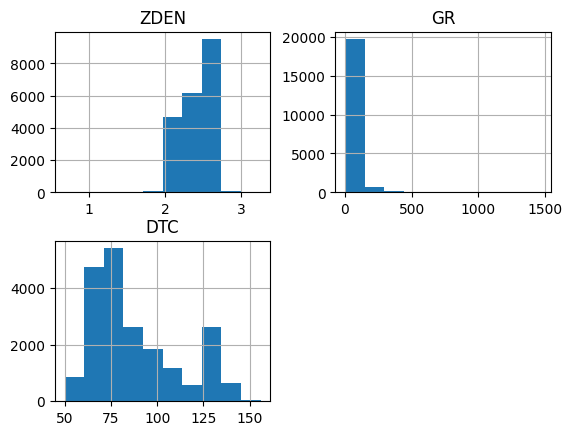

In [35]:
three_hist = three.hist()

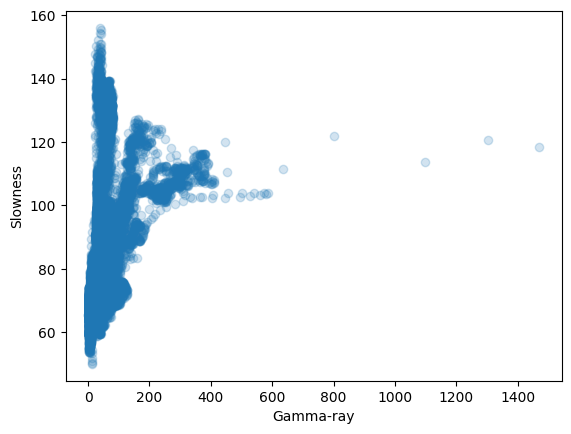

In [36]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(three.GR, three.DTC, alpha=0.2)
plt.xlabel('Gamma-ray')
plt.ylabel('Slowness')
plt.show()

In [37]:
# remove anomalous density values and anomalous gamma-ray values
three2=three.loc[(three.ZDEN > 1.5) & (three.ZDEN < 3.1) &
                 (three.GR < 400)]
three2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20481 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20481 non-null  float64
 1   GR      20481 non-null  float64
 2   DTC     20481 non-null  float64
dtypes: float64(3)
memory usage: 640.0 KB


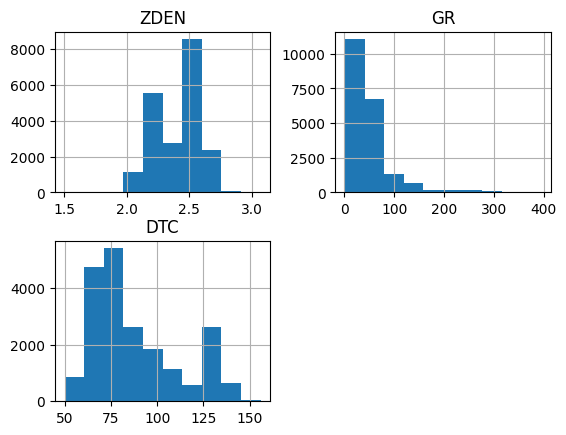

In [38]:
three2_hist = three2.hist()

In [39]:
# divide into training and testing
select3 = np.random.rand(len(three2)) < 0.8
train3 = three2[select3]
test3 = three2[~select3]

train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16393 entries, 573 to 30142
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    16393 non-null  float64
 1   GR      16393 non-null  float64
 2   DTC     16393 non-null  float64
dtypes: float64(3)
memory usage: 512.3 KB


In [40]:
# create model
model3 = linear_model.LinearRegression()

# train model
model3.fit(train3[['ZDEN', 'GR']], train3['DTC'])

LinearRegression()

In [41]:
# regression coefficients
print('Intercept: ', model3.intercept_)
print('Coefficients: ', model3.coef_)

Intercept:  323.84411624813384
Coefficients:  [-99.97324816   0.11238622]


The model changes from
$$s(\rho) = a + b\,\rho$$
to
$$s(\rho,\gamma) = a + b\,\rho + c\,\gamma$$

and also involves three parameters ($a,b,c$) instead of two ($a,b$).

It represents a plane in the three-dimensional space instead of a line in the two-dimensional space.

In [42]:
want3 = test3['DTC']
get3 = model3.predict(test3[['ZDEN', 'GR']])

print("RMS error: %.3f" % root_mean_squared_error(get3, want3))

RMS error: 12.533


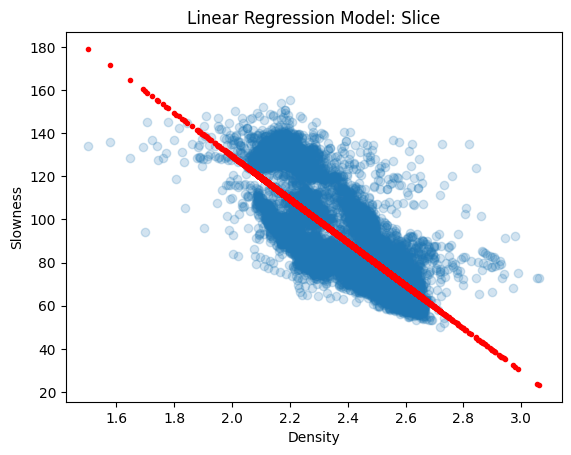

In [43]:
plt.scatter(train3.ZDEN, train3.DTC, alpha=0.2)
plt.plot(train3.ZDEN, model3.intercept_ +
         train3.ZDEN * model3.coef_[0] +
         np.mean(train3.GR) * model3.coef_[1], '.r')
plt.title('Linear Regression Model: Slice')
plt.xlabel('Density')
plt.ylabel('Slowness')
plt.show()

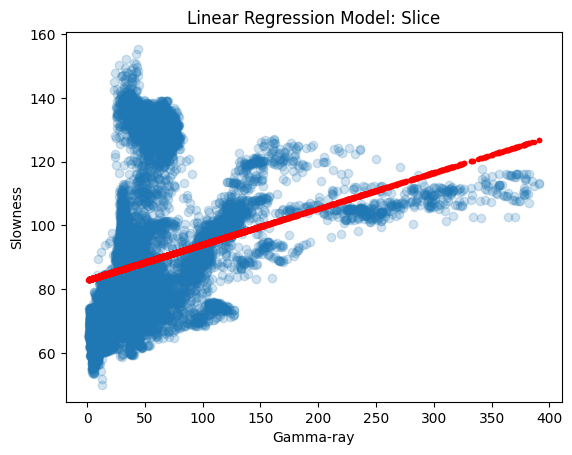

In [44]:
plt.scatter(train3.GR, train3.DTC, alpha=0.2)
plt.plot(train3.GR, model3.intercept_ +
         np.mean(train3.ZDEN) * model3.coef_[0] +
         train3.GR * model3.coef_[1], '.r')
plt.title('Linear Regression Model: Slice')
plt.xlabel('Gamma-ray')
plt.ylabel('Slowness')
plt.show()

In [45]:
D = np.linspace(np.min(train3.ZDEN), np.max(train3.ZDEN), 10)
G = np.linspace(np.min(train3.GR), np.max(train3.GR), 10)
D, G = np.meshgrid(D, G)
S = model3.intercept_ + D * model3.coef_[0] + G * model3.coef_[1]

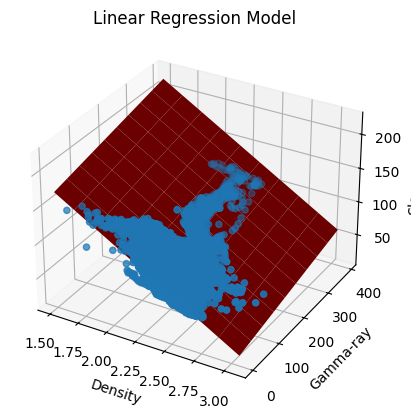

In [46]:
axes = plt.axes(projection='3d')
axes.scatter(train3.ZDEN, train3.GR, train3.DTC)
axes.plot_surface(D, G, S, color='r')
plt.title('Linear Regression Model')
axes.set_xlabel('Density')
axes.set_ylabel('Gamma-ray')
axes.set_zlabel('Slowness')
plt.show()

## Task 2

<div class="alert alert-block alert-info">
Can you improve the fit further by using more logs for prediction in addition to density and gamma-ray?

$$s(l_1,l_2,\cdots,l_N) = a_0 + b_1\,l_1 + b_2\,l_2  + \cdots + b_N\,l_N$$

Choose $N \ge 3$ and add code to try it out.

The suitable logs are neutron, gamma ray, deep resistance, medium resistance, photo-electric factor, and density.</div>

In [47]:
# Select the desired logs for prediction
selected_logs = ['ZDEN', 'GR', 'CNC']
four = logs.loc[:, selected_logs + ['DTC']]
four.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20525 non-null  float64
 1   GR      20525 non-null  float64
 2   CNC     20525 non-null  float64
 3   DTC     20525 non-null  float64
dtypes: float64(4)
memory usage: 801.8 KB


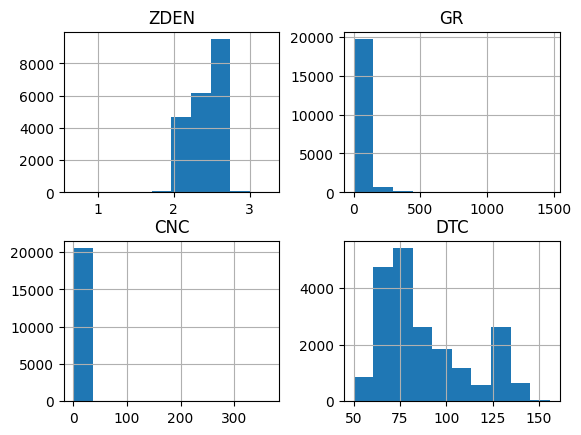

In [48]:
four_hist = four.hist()

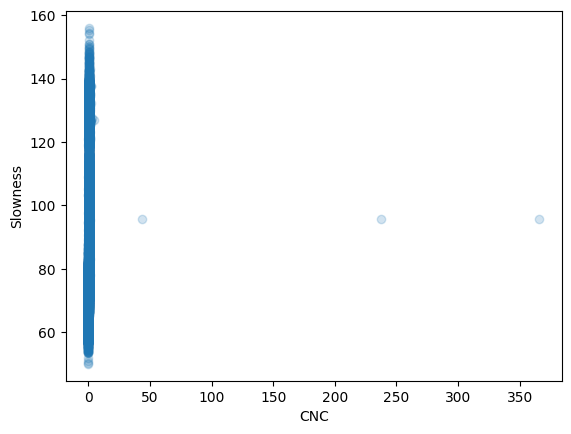

In [49]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(four.CNC, four.DTC, alpha=0.2)
plt.xlabel('CNC')
plt.ylabel('Slowness')
plt.show()

In [50]:
summary_CNC = four['CNC'].describe()

In [51]:
IQR_CNC = summary_CNC['75%'] - summary_CNC['25%']
print(IQR_CNC)

0.2087


In [52]:
# Remove anomalous values
four2 = four.loc[(four.ZDEN > 1.5) & (four.ZDEN < 3.1) & (four.GR < 400) & (four.CNC > summary_CNC['25%']) & (four.CNC < summary_CNC['75%'])]

# Divide into training and testing
select4 = np.random.rand(len(four2)) < 0.8
train4 = four2[select4]
test4 = four2[~select4]

In [53]:
# Create and train the model
model4 = linear_model.LinearRegression()
model4.fit(train4[selected_logs], train4['DTC'])

LinearRegression()

In [54]:
# regression coefficients
print('Intercept: ', model4.intercept_)
print('Coefficients: ', model4.coef_)

Intercept:  131.90126589253492
Coefficients:  [-3.00141692e+01  6.18573287e-02  1.02729808e+02]


In [55]:
# Evaluate the model
want4 = test4['DTC']
get4 = model4.predict(test4[selected_logs])

print("RMS error: %.3f" % root_mean_squared_error(get4, want4))

RMS error: 5.013


In [56]:
# Select the desired logs for prediction
selected_logs = ['ZDEN', 'GR', 'CNC', 'HRD', 'HRM', 'PE']
six = logs.loc[:, selected_logs + ['DTC']]
six.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ZDEN    20525 non-null  float64
 1   GR      20525 non-null  float64
 2   CNC     20525 non-null  float64
 3   HRD     20525 non-null  float64
 4   HRM     20525 non-null  float64
 5   PE      20525 non-null  float64
 6   DTC     20525 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


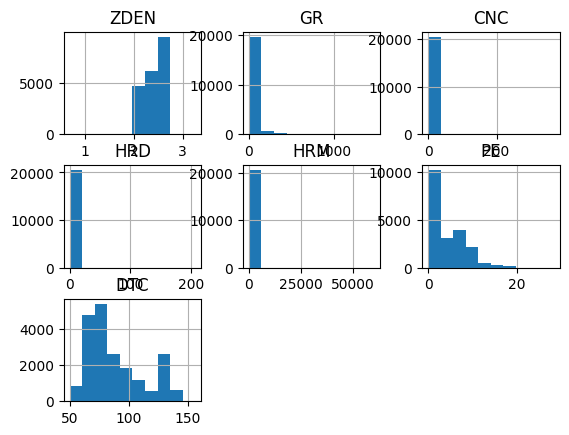

In [57]:
six_hist = six.hist()

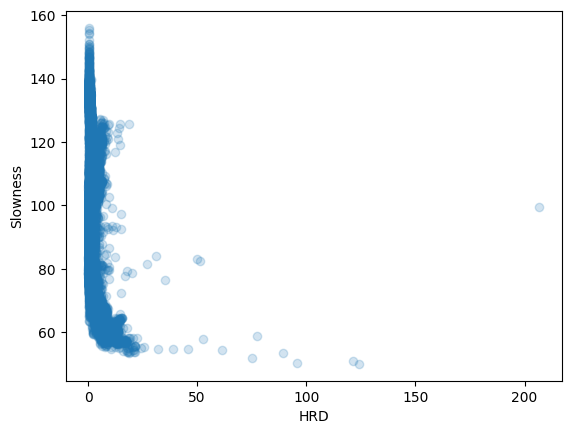

In [58]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(six.HRD, six.DTC, alpha=0.2)
plt.xlabel('HRD')
plt.ylabel('Slowness')
plt.show()

In [59]:
summary_HRD = six['HRD'].describe()

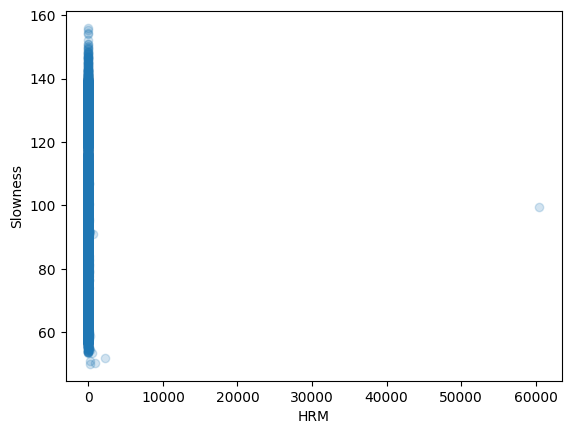

In [60]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(six.HRM, six.DTC, alpha=0.2)
plt.xlabel('HRM')
plt.ylabel('Slowness')
plt.show()

In [61]:
summary_HRM = six['HRM'].describe()

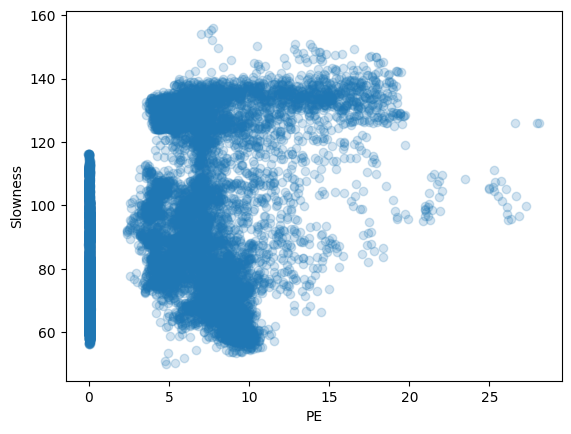

In [62]:
# display scatter plot

import matplotlib.pyplot as plt
plt.scatter(six.PE, six.DTC, alpha=0.2)
plt.xlabel('PE')
plt.ylabel('Slowness')
plt.show()

In [63]:
summary_PE = six['PE'].describe()

In [64]:
# Remove anomalous values
six2 = six.loc[(six.ZDEN > 1.5) & (six.ZDEN < 3.1) & (six.GR < 400) & (six.CNC > summary_CNC['25%']) & (six.CNC < summary_CNC['75%']) & (six.HRD > summary_HRD['25%']) & (six.HRD < summary_HRD['75%']) & (six.HRM > summary_HRM['25%']) & (six.HRM < summary_HRM['75%']) & (six.PE > summary_PE['25%']) & (six.PE < summary_PE['75%'])]

# Divide into training and testing
select6 = np.random.rand(len(six2)) < 0.8
train6 = six2[select6]
test6 = six2[~select6]

In [65]:
# Create and train the model
model6 = linear_model.LinearRegression()
model6.fit(train6[selected_logs], train6['DTC'])

LinearRegression()

In [66]:
# regression coefficients
print('Intercept: ', model6.intercept_)
print('Coefficients: ', model6.coef_)

Intercept:  145.39013442826143
Coefficients:  [-3.54779533e+01  5.31872933e-02  9.01315476e+01 -5.08368699e-01
  1.14902192e+00  5.51006507e-01]


In [67]:
# Evaluate the model
want6 = test6['DTC']
get6 = model6.predict(test6[selected_logs])

print("RMS error: %.3f" % root_mean_squared_error(get6, want6))

RMS error: 4.226


## Conclusions

Simple linear regression is too primitive to be of practical use in this case.

However, it illustrates the general principles of supervised learning:

1. Our goal is to predict one part of the data from the other parts.
2. To make a prediction, we build a model which depends on parameters.
3. The parameters are estimated from training data by minimizing an objection function, which measures the prediction error.
4. Minimization generally involves a form of gradient descent (*analytical in the case of linear regression*.)
5. We can set aside part of the available data and use it for validation.
6. There are uncertainties in the parameter estimation and the model prediction.

## Bonus Task 3

<div class="alert alert-block alert-info">
Continue using the Linear Regression approach but try to improve the results by non-linear transformations of the dependent variables. The task is open-ended, but here are some possibilities to explore:</div>

1. Try predicting velocity (1/slowness) instead of slowness.

In [68]:
logs['Velocity'] = logs['DTC'].apply(lambda x: 1/x)

In [69]:
# Select the desired logs for prediction
selected_logs = ['ZDEN', 'GR', 'CNC', 'HRD', 'HRM', 'PE']
vel = logs.loc[:, selected_logs + ['Velocity']]
vel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ZDEN      20525 non-null  float64
 1   GR        20525 non-null  float64
 2   CNC       20525 non-null  float64
 3   HRD       20525 non-null  float64
 4   HRM       20525 non-null  float64
 5   PE        20525 non-null  float64
 6   Velocity  20525 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


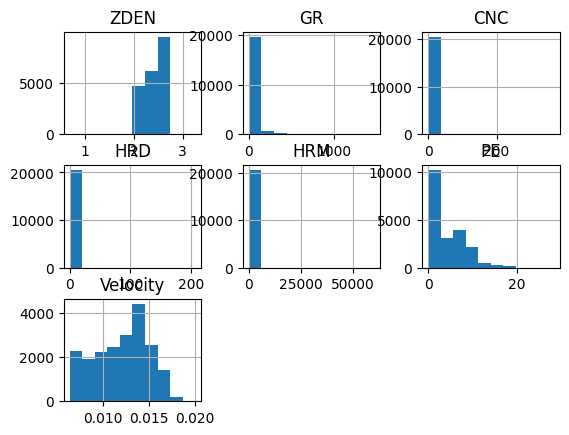

In [70]:
vel_hist = vel.hist()

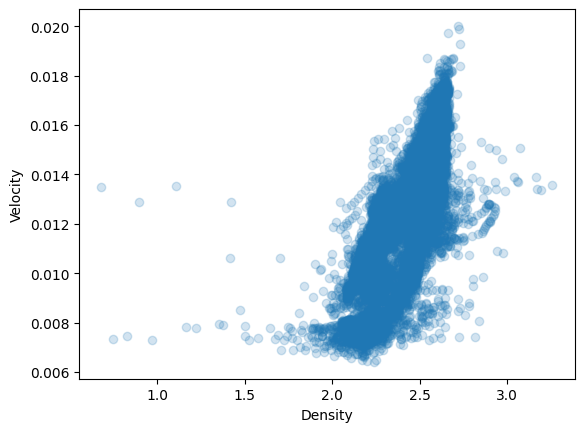

In [71]:
plt.scatter(vel.ZDEN, vel.Velocity, alpha=0.2)
plt.xlabel('Density')
plt.ylabel('Velocity')
plt.show()

In [72]:
summary_ZDEN = vel['ZDEN'].describe()

In [73]:
summary_vel_GR = vel['GR'].describe()

In [74]:
summary_vel_CNC = vel['CNC'].describe()

In [75]:
summary_vel_HRD = vel['HRD'].describe()

In [76]:
summary_vel_HRM = vel['HRM'].describe()

In [77]:
summary_vel_PE = vel['PE'].describe()

In [78]:
# Remove anomalous values
vel2 = vel.loc[(vel.ZDEN > summary_ZDEN['25%']) & (vel.ZDEN < summary_ZDEN['75%']) & (vel.GR > summary_vel_GR['25%']) & (vel.GR < summary_vel_GR['75%']) & (vel.CNC > summary_vel_CNC['25%']) & (vel.CNC < summary_vel_CNC['75%']) & (vel.HRD > summary_vel_HRD['25%']) & (vel.HRD < summary_vel_HRD['75%']) & (vel.HRM > summary_vel_HRM['25%']) & (vel.HRM < summary_vel_HRM['75%']) & (vel.PE > summary_vel_PE['25%']) & (vel.PE < summary_vel_PE['75%'])]

# Divide into training and testing
selectvel = np.random.rand(len(vel2)) < 0.8
trainvel = vel2[selectvel]
testvel = vel2[~selectvel]

In [79]:
# Create and train the model
vel_model = linear_model.LinearRegression()
vel_model.fit(trainvel[selected_logs], trainvel['Velocity'])

LinearRegression()

In [80]:
# regression coefficients
print('Intercept: ', vel_model.intercept_)
print('Coefficients: ', vel_model.coef_)

Intercept:  0.012396122626901838
Coefficients:  [ 1.24458965e-03 -4.71109070e-06 -1.42133930e-02  3.52435318e-05
  5.15221103e-05 -7.87158174e-05]


In [81]:
# Evaluate the model
want_vel = testvel['Velocity']
get_vel = vel_model.predict(testvel[selected_logs])

print("RMS error: %.3f" % root_mean_squared_error(get6, want6))

RMS error: 4.226


2. [Gardner's equation](https://wiki.seg.org/wiki/Dictionary:Gardner%E2%80%99s_equation) suggests an empirical relationship between density and velocity of the form

$$\rho = \alpha\,v^{\beta}\;,$$

where the parameters $\alpha$ and $\beta$ depend on lithology.

Taking the logarithm of both sides,

$$\log \rho = \log{\alpha} + \beta\,\log{v}\ = \log{\alpha} - \beta\,\log{s}\;.$$

This relationship suggests switching to logarithms in the linear regression model.

In [82]:
# Select the desired logs for prediction and apply log transformations
selected_logs = ['ZDEN', 'GR', 'CNC', 'HRD', 'HRM', 'PE']
vel_gardner = logs.loc[:, selected_logs + ['Velocity']]
vel_gardner['log_ZDEN'] = np.log(vel_gardner['ZDEN'])    # Log transform density
vel_gardner['log_Velocity'] = np.log(vel_gardner['Velocity'])  # Log transform velocity

# Data information
vel_gardner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20525 entries, 573 to 30142
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZDEN          20525 non-null  float64
 1   GR            20525 non-null  float64
 2   CNC           20525 non-null  float64
 3   HRD           20525 non-null  float64
 4   HRM           20525 non-null  float64
 5   PE            20525 non-null  float64
 6   Velocity      20525 non-null  float64
 7   log_ZDEN      20525 non-null  float64
 8   log_Velocity  20525 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [84]:
# Create and train the model
vel_gardner_model = linear_model.LinearRegression()
vel_gardner_model.fit(vel_gardner[selected_logs], vel_gardner['log_Velocity']) # Predict log_Velocity

LinearRegression()

In [86]:
# Evaluate the model
want_vel = testvel['Velocity']  # Original velocity values for comparison
get_vel = vel_gardner_model.predict(testvel[selected_logs])  # Predictions in log scale

# Reverse the logarithmic transformation
get_vel = np.exp(get_vel)  # Convert predicted log_Velocity back to Velocity

print("RMS error: %.3f" % root_mean_squared_error(get_vel, want_vel))

RMS error: 0.001


3. Try other non-linear functions of logs in addition to multiple logs as independent variables in linear regression.